# Accessing the Zip File

In [1]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

Cloning into 'Datasets'...
remote: Enumerating objects: 9874, done.
remote: Total 9874 (delta 0), reused 0 (delta 0), pack-reused 9874
Receiving objects: 100% (9874/9874), 427.70 MiB | 39.21 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (9345/9345), done.


# Unzipping the Zip File

In [2]:
# unzipping the contents
!unzip animal_data/train_beg.zip

Archive:  animal_data/train_beg.zip
   creating: train_beg/
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_beg/Image_1018.jpg  
  inflating: train_beg/Ima

# Accessing the CSV File to Create Label

In [3]:
# accessing the given csv file
import pandas as pd
labels_csv = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
labels_csv.head()   # this file contains file name and corresponding labels

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


# Getting the name and path of all image files

In [4]:
image_paths = [[fname, '/content/train_beg/' + fname[:-4] + '.jpg'] for fname in labels_csv['filename']]
image_paths

[['Image_1.jpg', '/content/train_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/train_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/train_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/train_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/train_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/train_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/train_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/train_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/train_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/train_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/train_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/train_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/train_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/train_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/train_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/train_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/train_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/train_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/train_beg/Image_19

In [5]:
# Confirm if number of images is same as number of labels given
if len(labels_csv) == len(image_paths):
    print('Number of labels i.e. ', len(labels_csv), 'matches the number of filenames i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  1200 matches the number of filenames i.e.  1200


# Creating a DataFrame for image names and image paths

In [6]:
images = pd.DataFrame(image_paths)
images.columns = ['filename', 'file']
images

,filename,file
0,Image_1.jpg,/content/train_beg/Image_1.jpg
1,Image_2.jpg,/content/train_beg/Image_2.jpg
2,Image_3.jpg,/content/train_beg/Image_3.jpg
3,Image_4.jpg,/content/train_beg/Image_4.jpg
4,Image_5.jpg,/content/train_beg/Image_5.jpg
...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg


# Combining the labels with the images

In [7]:
train_data = pd.merge(images, labels_csv, how = 'inner', on = 'filename')
train_data

,filename,file,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca
...,...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg,pecora
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg,pecora
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg,pecora
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg,pecora


# Loading Images

In [11]:
import cv2
IMG_SIZE=200
data = []
for i in range(len(train_data)):
  img_array = cv2.imread(train_data['file'][i])
  img_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
  data.append(img_array) #  append the image array and the label of each file into data

In [12]:
print(data[0]) #Checking if the data has stored the pixel information.

[[[207 205 205]
  [207 205 205]
  [207 205 205]
  ...
  [204 203 205]
  [204 203 205]
  [205 204 206]]

 [[205 203 203]
  [206 204 204]
  [206 204 204]
  ...
  [203 202 204]
  [204 203 205]
  [206 205 207]]

 [[207 205 205]
  [205 203 203]
  [205 203 203]
  ...
  [202 201 203]
  [205 204 206]
  [208 207 209]]

 ...

 [[246 253 248]
  [235 254 250]
  [201 250 241]
  ...
  [253 253 253]
  [254 254 254]
  [254 254 254]]

 [[241 250 245]
  [233 254 249]
  [197 249 239]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[243 251 247]
  [235 255 251]
  [199 250 241]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


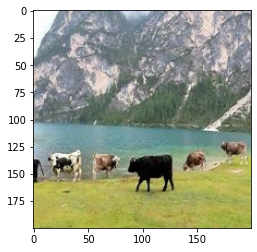

In [13]:
#Check if we are able to print image
import numpy as np

import matplotlib.pyplot as plt
img = cv2.cvtColor(np.squeeze(data[1]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [14]:
np.shape(data)

(1200, 200, 200, 3)

In [15]:
data = np.array(data)

# Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, train_data['animal_type'], test_size=0.3, random_state = 42)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(840, 200, 200, 3)
(840,)
(360, 200, 200, 3)
(360,)


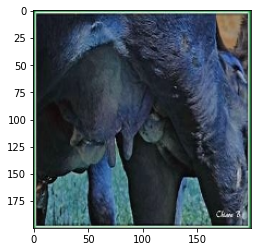

mucca


In [18]:
index = 10
plt.imshow(X_train[index])
plt.show()
print(y_train.iloc[index])

# Data Modelling

In [19]:
print(X_train.shape)
print(X_test.shape)

(840, 200, 200, 3)
(360, 200, 200, 3)


In [20]:
# scalling the data
X_train = X_train/255
X_test = X_test/255

In [21]:
# one hot encoding of labels
print(y_train.shape)
print(y_test.shape)

(840,)
(360,)


In [22]:
y_train

522      mucca
213      mucca
120      mucca
917     pecora
1067    pecora
         ...  
1044    pecora
1095    pecora
1130    pecora
860     pecora
1126    pecora
Name: animal_type, Length: 840, dtype: object

In [23]:
train_data['animal_type'].unique()

array(['mucca', 'pecora'], dtype=object)

In [24]:
class_names = ['mucca', 'pecora']
len(class_names)

2

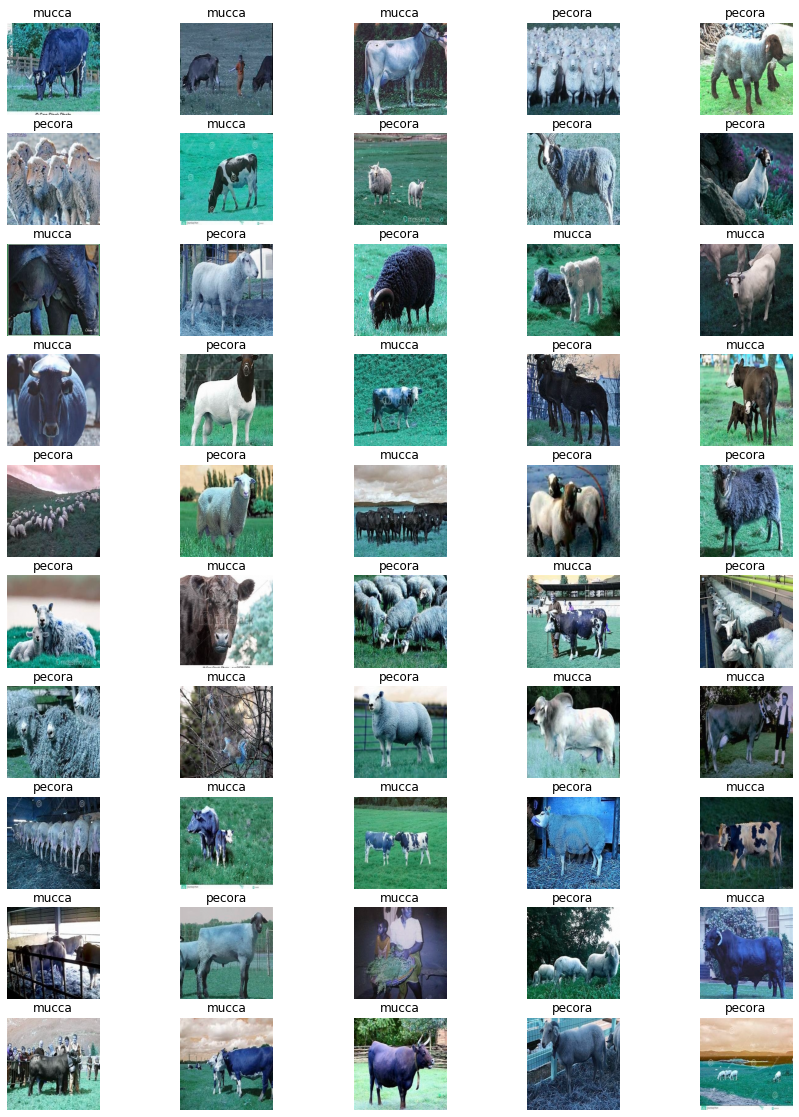

In [25]:
fig,axes = plt.subplots(nrows=10,ncols=5,figsize=(15,20))
axes = axes.flatten()
for i,ax in zip(range(50),axes):
  ax.imshow(X_train[i])
  ax.set_title(y_train.iloc[i])
  ax.axis('off')
plt.show()

In [26]:
new_y_train = []
for item in y_train:
    if item == 'mucca':
      new_y_train.append(0)
    else:
      new_y_train.append(1)

In [27]:
new_y_test = []
for item in y_test:
    if item == 'mucca':
      new_y_test.append(0)
    else:
      new_y_test.append(1)

In [28]:
X_train[0].shape

(200, 200, 3)

In [29]:
new_y_train[0]

0

In [30]:
import tensorflow as tf
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [31]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#model = Sequential()
#model.add(data_augmentation)
model = Sequential()
model.add( Conv2D(64, (3,3), input_shape = X_train.shape[1:])   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)           

In [33]:
new_y_train = np.array(new_y_train)

In [34]:
new_y_test = np.array(new_y_test)

In [35]:
history = model.fit(X_train,new_y_train,batch_size=32, epochs=10,verbose=True,validation_data=(X_test,new_y_test)) 
# batch_size=32, epochs=3, validation_split=0.3),validation_data=(X_test,new_y_test))

Epoch 1/10
27/27 [==============================] - 2s 69ms/step - loss: 0.9856 - accuracy: 0.5655 - val_loss: 0.6505 - val_accuracy: 0.6278
Epoch 2/10
27/27 [==============================] - 2s 59ms/step - loss: 0.6138 - accuracy: 0.6702 - val_loss: 0.6422 - val_accuracy: 0.5889
Epoch 3/10
27/27 [==============================] - 2s 60ms/step - loss: 0.4811 - accuracy: 0.7702 - val_loss: 0.5815 - val_accuracy: 0.7222
Epoch 4/10
27/27 [==============================] - 2s 59ms/step - loss: 0.2792 - accuracy: 0.8964 - val_loss: 0.6153 - val_accuracy: 0.7361
Epoch 5/10
27/27 [==============================] - 2s 58ms/step - loss: 0.1532 - accuracy: 0.9464 - val_loss: 0.7784 - val_accuracy: 0.6861
Epoch 6/10
27/27 [==============================] - 2s 59ms/step - loss: 0.0908 - accuracy: 0.9738 - val_loss: 0.8699 - val_accuracy: 0.7222
Epoch 7/10
27/27 [==============================] - 2s 60ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 1.0829 - val_accuracy: 0.7000
Epoch 8/10
27

In [36]:
!unzip animal_data/test_beg.zip

Archive:  animal_data/test_beg.zip
   creating: test_beg/
  inflating: test_beg/Image_1.jpg    
  inflating: test_beg/Image_10.jpg   
  inflating: test_beg/Image_100.jpg  
  inflating: test_beg/Image_101.jpg  
  inflating: test_beg/Image_102.jpg  
  inflating: test_beg/Image_103.jpg  
  inflating: test_beg/Image_104.jpg  
  inflating: test_beg/Image_105.jpg  
  inflating: test_beg/Image_106.jpg  
  inflating: test_beg/Image_107.jpg  
  inflating: test_beg/Image_108.jpg  
  inflating: test_beg/Image_109.jpg  
  inflating: test_beg/Image_11.jpg   
  inflating: test_beg/Image_110.jpg  
  inflating: test_beg/Image_111.jpg  
  inflating: test_beg/Image_112.jpg  
  inflating: test_beg/Image_113.jpg  
  inflating: test_beg/Image_114.jpg  
  inflating: test_beg/Image_115.jpg  
  inflating: test_beg/Image_116.jpg  
  inflating: test_beg/Image_117.jpg  
  inflating: test_beg/Image_118.jpg  
  inflating: test_beg/Image_119.jpg  
  inflating: test_beg/Image_12.jpg   
  inflating: test_beg/Image_12

In [37]:
import pandas as pd
Testing_set_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv", header=None)

In [42]:
test_image_paths = ['/content/test_beg/' + fname[:-4] + '.jpg' for fname in Testing_set_animals[0].to_list()]

X_pred = []
for fpath in test_image_paths:
  imgX = cv2.imread(fpath)
  imgX = cv2.resize(img,(200,200))
  X_pred.append(imgX)

In [43]:
X_pred

[array([[[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [129, 133, 144],
         [150, 153, 165],
         [142, 144, 156]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [157, 161, 171],
         [173, 177, 188],
         [161, 165, 176]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [158, 165, 174],
         [184, 191, 201],
         [171, 178, 188]],
 
        ...,
 
        [[181, 185,  82],
         [179, 183,  80],
         [179, 184,  81],
         ...,
         [167, 177,  78],
         [168, 178,  79],
         [170, 180,  81]],
 
        [[186, 192,  89],
         [177, 182,  79],
         [182, 188,  85],
         ...,
         [161, 171,  74],
         [167, 177,  79],
         [177, 187,  88]],
 
        [[189, 196,  92],
         [171, 178,  74],
         [179, 186,  82],
         ...,
         [158, 168,  71],
  

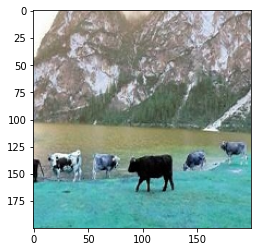

In [44]:
import matplotlib.pyplot as plt
img1 = cv2.cvtColor(np.squeeze(X_pred[1]), cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

In [47]:
X_pred = np.array(X_pred)

In [49]:
X_pred.shape

(400, 200, 200, 3)

In [50]:
X_pred = X_pred/255

In [51]:
preds = np.argmax(model.predict(X_pred), axis=1)

In [58]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
preds = np.array(preds)

In [62]:
new_y_pred = []
for item in preds:
    if item == 0:
      new_y_pred.append('mucca')
    else:
      new_y_pred.append('pecora')

In [63]:
new_y_pred

['mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',
 'mucca',


In [68]:
res = pd.DataFrame(new_y_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = Testing_set_animals.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>